# Coursework 1
## MTH739P: Topics in Scientific Computing
### Gerardo Duran Martín 

In [1]:
using Plots
using LaTeXStrings

In [2]:
default(size=(650, 300))

## Question 1.

> Product the following four function plots, in the specified interval, using axis labels, a title and/or legend, and the specified number of points

a)

$$
    h(x) = \begin{cases}
    \frac{1}{x}\sin(x) & x\neq 0 \\
    1 & x = 0
    \end{cases}
$$

Using $n=100$ equally spaced points for $x\in[0, 2\pi]$. Display $h(x)$ with a dotted magenta line

In [3]:
function h(x)
    if x != 0
        return sin(x) / x
    else
        return 1
    end
end

h (generic function with 1 method)

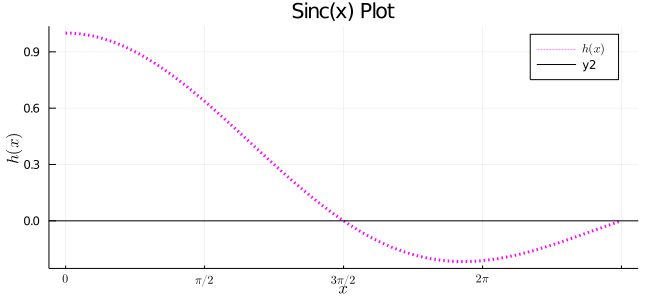

In [4]:
xvals = range(0, 2π, length=100)
xticks_labs = [L"0", L"\pi/2", L"3\pi/2", L"2\pi"]
xticks_vals = 0:π/2:2π

plot(xvals, h.(xvals), title="Sinc(x) Plot", label=L"h(x)",
    lw=3, c="magenta", linestyle=:dot,
    xticks=(xticks_vals, xticks_labs))
plot!([0], seriestype=:hline, c="black")
xlabel!(L"x")
ylabel!(L"h(x)")

b)

Produce a plot of the two functions

$$
    f(y) = y(2 y^2 - 5)(y^2 - 1)^{1/2} + 3 \log\left(y + (y^2 - 1)^{1/2}\right)
$$

$$
    g(y) = y (2 y ^ 2 - 1) (y^2 - 1)^{1/2} - \log(y + (y^2 - 1)^{1/2})
$$

In [5]:
function f(y)
    term = sqrt(y ^ 2 - 1)
    fval = y * (2 * y ^ 2 - 5) * term + 3 * log(y + term)
    return fval
end

function g(y)
    term = sqrt(y^2 - 1)
    gval = y * (2 * y ^ 2 - 1) * term - log(y + term)
    return gval
end

g (generic function with 1 method)

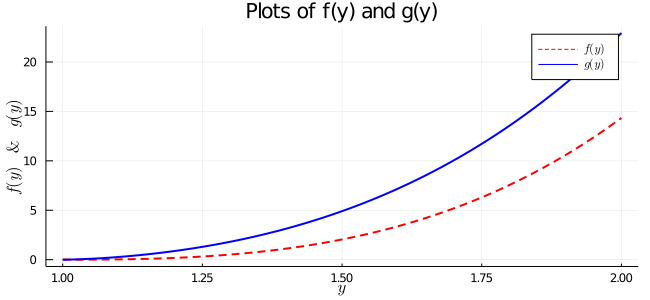

In [6]:
xvals = range(1, 2, length=100)
f_vals = f.(xvals)
g_vals = g.(xvals)

plot(xvals, f_vals, label=L"f(y)", c="red", style=:dash, lw=2)
plot!(xvals, g_vals, label=L"g(y)", c="blue", style=:solid, lw=2)
xlabel!(L"y")
ylabel!(L"f(y)\quad &\quad g(y)")
title!("Plots of f(y) and g(y)")

c)

Produce a parametric log-log plot of $s=f(y)$ as a function of $t=g(y)$, with $g(y)$ defined in `b)`, for $y\in[1, 2]$. Display the points $(t,s) = (g(y), f(y))$ in magenta

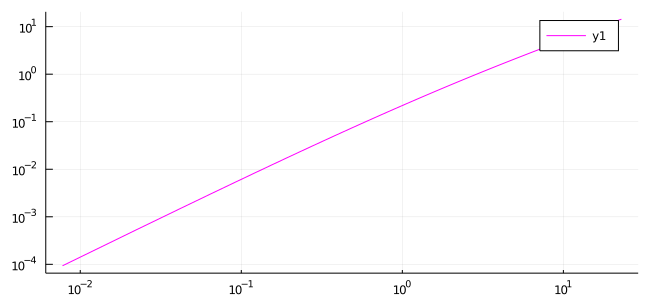

In [7]:
plot(g_vals[2:end], f_vals[2:end], xaxis=:log10, yaxis=:log10, c="magenta")

d)

Produce a plot of the two functions

$$
\begin{aligned}
    u(t) &= \cos(t)\\
    v(t) &= t
\end{aligned}
$$

For $t \in [0,1]$. Display $u(t)$ with a red solid line and $v(t)$ with green crosses

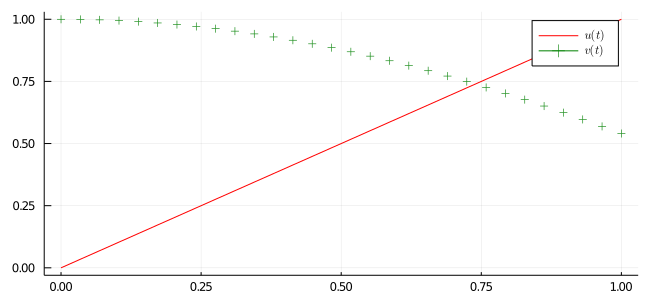

In [8]:
tvals = range(0, 1, length=30)
plot(tvals, tvals, c="red", label=L"u(t)")
plot!(tvals, cos.(tvals), c="green", marker=:cross, lw=0, label=L"v(t)")

## Question 2

In [9]:
x_old = 1.
eps = Inf

while eps > 10e-16
    x_new = cos(x_old)
    eps = abs(x_new - x_old)
    x_old = x_new
end

round(x_old, digits=16)

0.7390851332151603

In [10]:
x_old - cos(x_old)

-4.440892098500626e-16

## Question 3

## Question 4

In [11]:
new = [CartesianIndex()]
R = pi
N = 32
Δx = R / N

xi_values = (1:N+1 - 1 / 2) * Δx

0.09817477042468103:0.09817477042468103:3.141592653589793

In [20]:
h_old = ones(N, 1);
M = Δx * (xi_values[new, :] .^ 2 ./ max.(xi_values[:, new], xi_values[new, :]) .- xi_values[new, :]);

l2_err = Inf
eps_err = 10e-14

while l2_err > eps_err
    h_new = 1 .+ M * h_old;
    errs = h_new - h_old;
    l2_err = sqrt(sum(errs .^ 2))
    h_old = h_new
end

h_new = h_old;

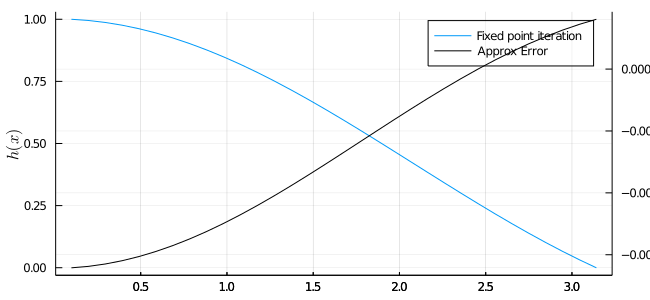

In [34]:
plot(xi_values, h_new, label="Fixed point iteration", ylabel=L"h(x)")
plot!(xi_values, NaN .* xi_values, label="Approx Error", c="black")
plot!(twinx(), xi_values, h.(xi_values) - h_new, legend=false, c="black")

## Question 6